In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv("healthcare-dataset-stroke-data.csv")
data=df.copy()
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [3]:
print(f"Dataset shape: {data.shape}")

print("\n Dataset Information: ")
data.info()

Dataset shape: (5110, 12)

 Dataset Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
#check for any duplicate data
data.duplicated().sum()

0

In [5]:
print("\n Statistics of Data")
print(data.describe().T)


 Statistics of Data
                    count          mean           std    min        25%  \
id                 5110.0  36517.829354  21161.721625  67.00  17741.250   
age                5110.0     43.226614     22.612647   0.08     25.000   
hypertension       5110.0      0.097456      0.296607   0.00      0.000   
heart_disease      5110.0      0.054012      0.226063   0.00      0.000   
avg_glucose_level  5110.0    106.147677     45.283560  55.12     77.245   
bmi                4909.0     28.893237      7.854067  10.30     23.500   
stroke             5110.0      0.048728      0.215320   0.00      0.000   

                         50%       75%       max  
id                 36932.000  54682.00  72940.00  
age                   45.000     61.00     82.00  
hypertension           0.000      0.00      1.00  
heart_disease          0.000      0.00      1.00  
avg_glucose_level     91.885    114.09    271.74  
bmi                   28.100     33.10     97.60  
stroke               

**DATA PREPROCESSING**

In [6]:
print("\n missing values per column: ")
missing_values=data.isna().sum()
print(missing_values)


 missing values per column: 
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


missing values plot: 



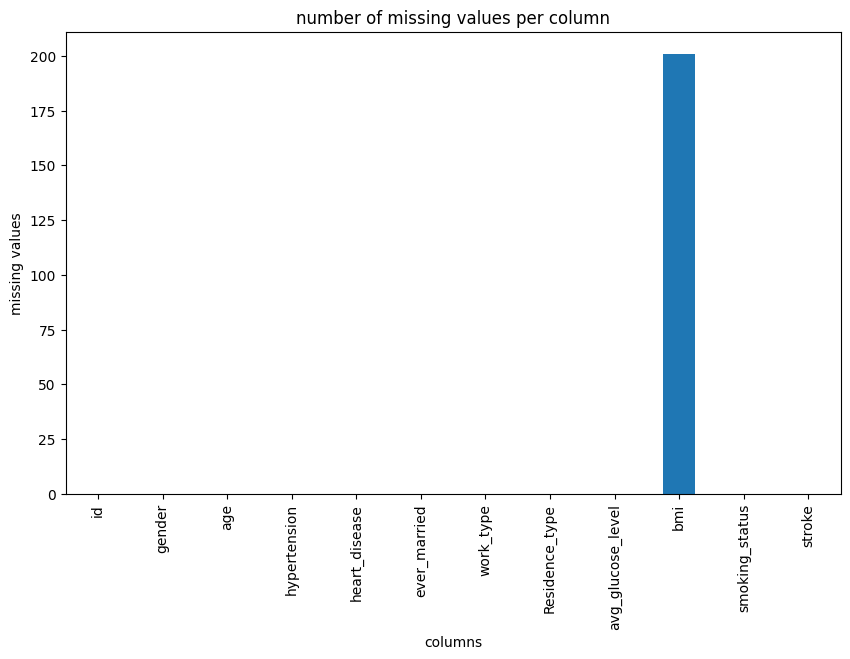

In [7]:
print("missing values plot: \n")
plt.figure(figsize=(10,6))
missing_values.plot(kind='bar')
plt.title('number of missing values per column')
plt.xlabel('columns')
plt.ylabel('missing values')
plt.xticks(rotation=90)
plt.show()

In [8]:
data.dropna(inplace=True)
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [9]:
data.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
data['ever_married'].value_counts()

ever_married
Yes    3204
No     1705
Name: count, dtype: int64

In [11]:
data['work_type'].value_counts()

work_type
Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: count, dtype: int64

In [12]:
data['Residence_type'].value_counts()

Residence_type
Urban    2490
Rural    2419
Name: count, dtype: int64

In [13]:
data['smoking_status'].value_counts()

smoking_status
never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: count, dtype: int64

**data cleaning**

In [14]:
# Drop rows where smoking_status is 'Unknown'
data = data.drop(data[data['smoking_status'] == 'Unknown'].index)

# Drop the 'id' column
data = data.drop('id', axis=1)

# Verify the changes
print("Dataset shape after dropping 'Unknown' smoking status and 'id' column:", data.shape)
print("\nUnique values in smoking_status:", data['smoking_status'].unique())

Dataset shape after dropping 'Unknown' smoking status and 'id' column: (3426, 11)

Unique values in smoking_status: ['formerly smoked' 'never smoked' 'smokes']


In [15]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5100,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
5102,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


**age and stroke relation**

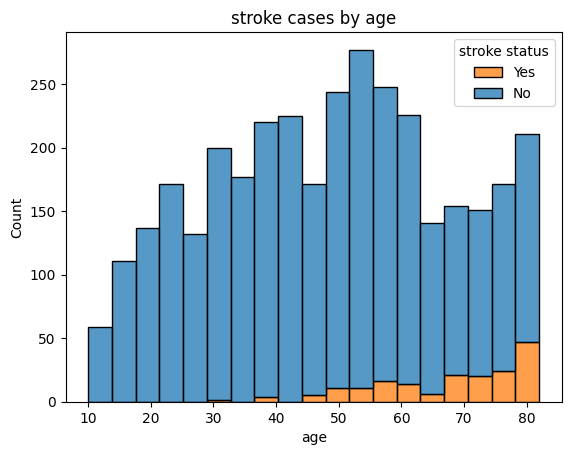

In [16]:
sns.histplot(data,x='age',hue='stroke',multiple='stack')
plt.title('stroke cases by age')
plt.legend(title='stroke status', labels=['Yes','No'])
plt.show()

In [17]:
stroke_count=data['stroke'].value_counts()
stroke_count

stroke
0    3246
1     180
Name: count, dtype: int64

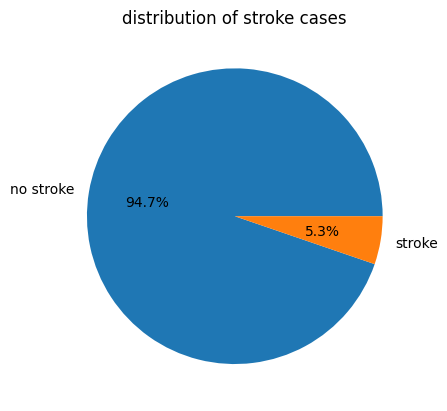

In [18]:
#presented in pie chart
stroke_count=[3246,180]
labels=('no stroke','stroke')
plt.pie(stroke_count,labels=labels,autopct='%1.1f%%')
plt.title('distribution of stroke cases')
plt.show()

**gender and stroke relation**

In [19]:
data['gender'].value_counts()

gender
Female    2086
Male      1339
Other        1
Name: count, dtype: int64

In [20]:
stroke_rate_gender=data.groupby('gender')['stroke'].mean() #all the rows with the same gender are grouped together and the mean of the stroke column for each gender is calculated.
stroke_rate_gender

gender
Female    0.050336
Male      0.056012
Other     0.000000
Name: stroke, dtype: float64

In [21]:
stroke_count_gender=stroke_rate_gender*data['gender'].value_counts()
stroke_count_gender
#calculates the number of stroke cases for each gender.

gender
Female    105.0
Male       75.0
Other       0.0
dtype: float64

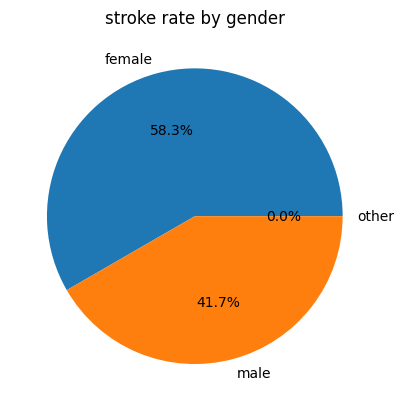

In [22]:
plt.pie(stroke_count_gender,labels=['female','male','other'],autopct='%1.1f%%')
plt.title('stroke rate by gender')
plt.show()

**smoking status and stroke relation**

In [23]:
data['smoking_status'].value_counts()

smoking_status
never smoked       1852
formerly smoked     837
smokes              737
Name: count, dtype: int64

In [24]:
stroke_rate_smoke=data.groupby('smoking_status')['stroke'].mean()
stroke_rate_smoke

smoking_status
formerly smoked    0.068100
never smoked       0.045356
smokes             0.052917
Name: stroke, dtype: float64

In [25]:
smoking_data={'smoking_status':['formerly smoked','never smoked','smokes'],
							'stroke_rate':[0.068100,0.045356,0.052917]}

In [26]:
smoke_stroke=pd.DataFrame(smoking_data)
smoke_stroke

,smoking_status,stroke_rate
0,formerly smoked,0.068100
1,never smoked,0.045356
2,smokes,0.052917


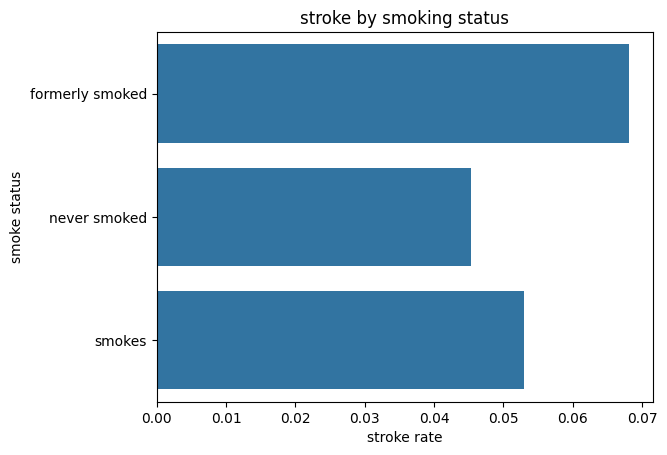

In [27]:
sns.barplot(data=smoke_stroke,y='smoking_status',x='stroke_rate')
plt.title('stroke by smoking status')
plt.xlabel('stroke rate')
plt.ylabel('smoke status')
plt.show()

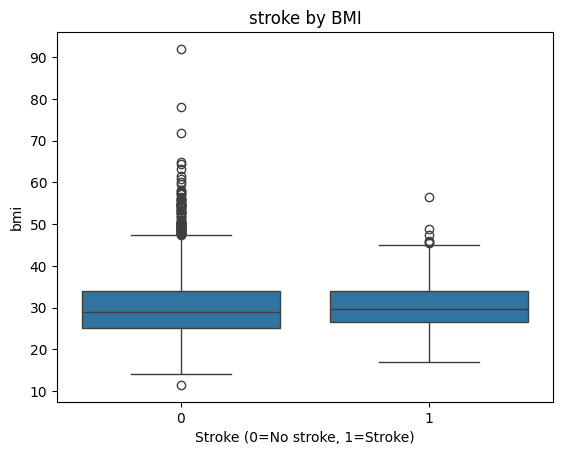

In [28]:
#is there a relationship between BMI and stroke?
sns.boxplot(x='stroke',y='bmi',data=data)
plt.title('stroke by BMI')
plt.xlabel('Stroke (0=No stroke, 1=Stroke)')
plt.ylabel('bmi')
plt.show()
#this is to show outliers. there are outliers in stroke wrt bmi so it has less chance to be a risk factor for stroke

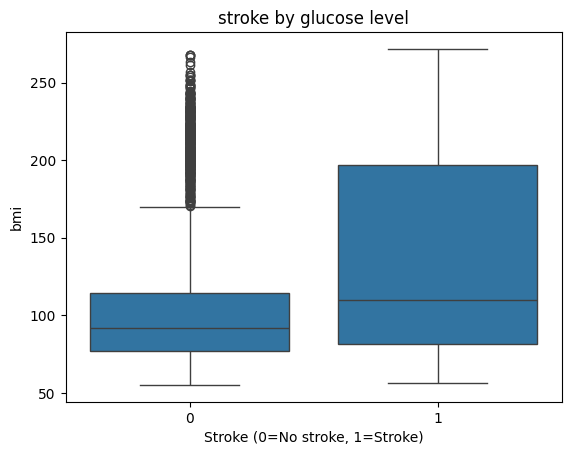

In [29]:
sns.boxplot(x='stroke',y='avg_glucose_level',data=data)
plt.title('stroke by glucose level')
plt.xlabel('Stroke (0=No stroke, 1=Stroke)')
plt.ylabel('bmi')
plt.show()
#outliers are there in no stroke(can be ignored). so basically as glucose level increases, chances of getting stroke also increases.so there is chance of glucose level being a risk factor.
#in box plot focus on the stroke cases.

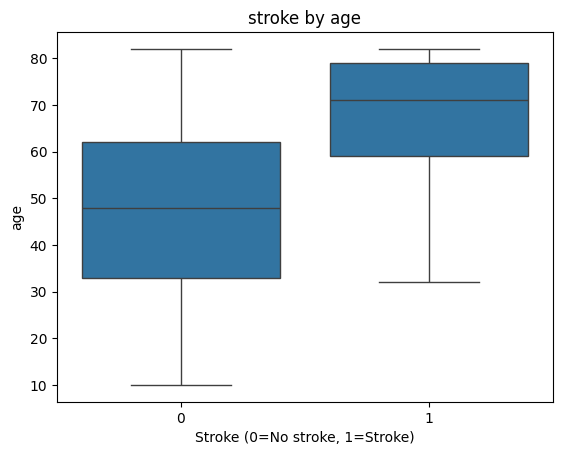

In [30]:
sns.boxplot(x='stroke',y='age',data=data)
plt.title('stroke by age')
plt.xlabel('Stroke (0=No stroke, 1=Stroke)')
plt.ylabel('age')
plt.show()
#age does not have any outliers. as age increases the chance of getting stroke is high.

**Data encoding using one-hot encoding, Balancing using SMOTE**

In [31]:
print(data['stroke'].value_counts())

stroke
0    3246
1     180
Name: count, dtype: int64


In [32]:
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_cols)
#categorical columns are encoded using one hot encoding.


Categorical Columns: Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


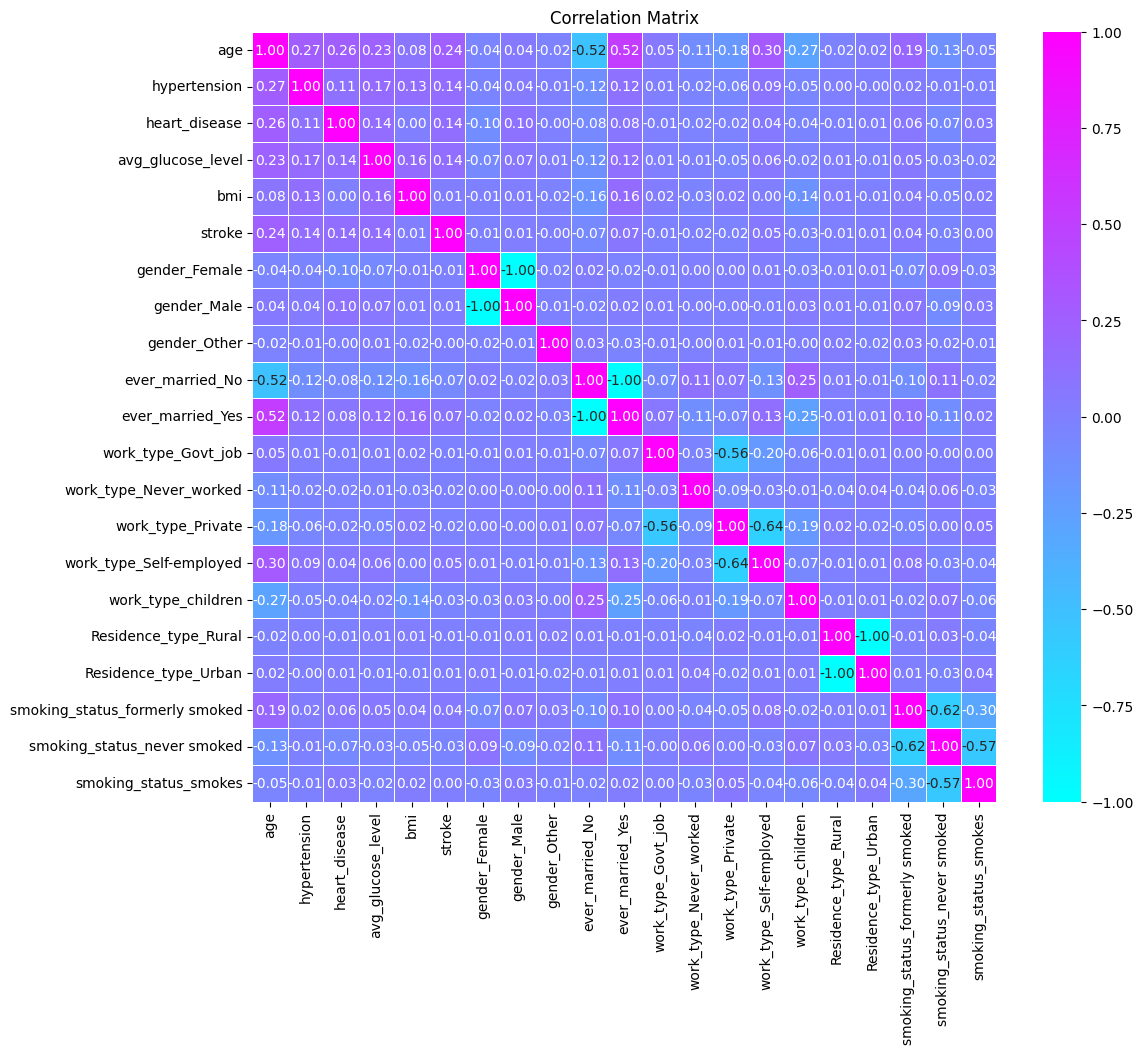

'\n1- strong positive relation\n0- no correlation\n-1- strong negative relation\n'

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=False) #one hot encoding applied. drop_first=false means the first category of the column wont be dropped.

# convert true or false to integer. as integers format is needed to compute the correlation matrix.
data_encoded = data_encoded.astype(int)

# correlation matrix is computed.
correlation_matrix = data_encoded.corr()

# heatmap of correlation matrix is plotted
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='cool', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

"""
1- strong positive relation
0- no correlation
-1- strong negative relation
"""

In [34]:
data_encoded

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67,0,1,228,36,1,0,1,0,0,...,0,0,1,0,0,0,1,1,0,0
2,80,0,1,105,32,1,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
3,49,0,0,171,34,1,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
4,79,1,0,174,24,1,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0
5,81,0,0,186,29,1,0,1,0,0,...,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5100,82,1,0,71,28,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
5102,57,0,0,77,21,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
5106,81,0,0,125,40,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0
5107,35,0,0,82,30,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0


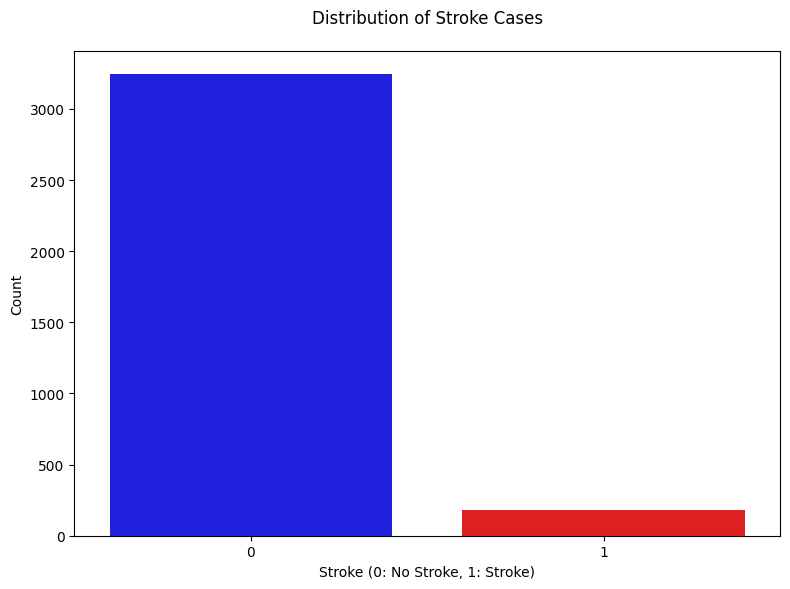

In [35]:
#before balancing data.
plt.figure(figsize=(8, 6)) # 8 inches-width,6-height
sns.countplot(data=data_encoded, x='stroke',hue='stroke', palette=['blue', 'red'],legend=False)
plt.title('Distribution of Stroke Cases', pad=20)
plt.xlabel('Stroke (0: No Stroke, 1: Stroke)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [36]:
from imblearn.over_sampling import SMOTE

X = data_encoded.drop(columns=["stroke"])  # Drop target column
y = data_encoded["stroke"]  # Target column

# Apply SMOTE
smote = SMOTE(sampling_strategy=0.90, random_state=42)  #ensures that minority class reaches 90% to the majority class.
X_balanced, y_balanced = smote.fit_resample(X, y) # creates synthetic samples.

# Check the new class distribution
data_balanced = pd.DataFrame(X_balanced, columns=X.columns)
data_balanced['stroke'] = y_balanced


print("\nBalanced class distribution after SMOTE:")
print(data_balanced['stroke'].value_counts())


Balanced class distribution after SMOTE:
stroke
0    3246
1    2921
Name: count, dtype: int64


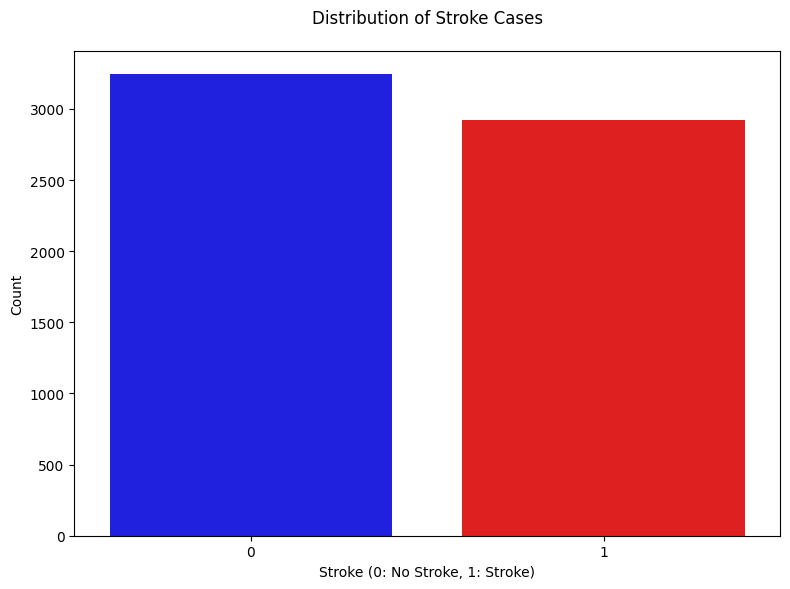

In [37]:
#after balancing with SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(data=data_balanced, x='stroke',hue='stroke', palette=['blue', 'red'],legend=False)
plt.title('Distribution of Stroke Cases', pad=20)
plt.xlabel('Stroke (0: No Stroke, 1: Stroke)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [38]:
data_balanced.shape

(6167, 21)

In [39]:
data_balanced

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,67,0,1,228,36,0,1,0,0,1,...,0,1,0,0,0,1,1,0,0,1
1,80,0,1,105,32,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,1
2,49,0,0,171,34,1,0,0,0,1,...,0,1,0,0,0,1,0,0,1,1
3,79,1,0,174,24,1,0,0,0,1,...,0,0,1,0,1,0,0,1,0,1
4,81,0,0,186,29,0,1,0,0,1,...,0,1,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6162,71,0,0,131,28,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
6163,67,0,0,137,30,0,1,0,0,1,...,0,1,0,0,0,0,1,0,0,1
6164,35,0,0,79,25,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6165,74,0,1,243,26,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
#resnet50+gru
"""
The architecture described follows the standard ResNet50 structure with specific stages and blocks: 
CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> CONVBLOCK -> IDBLOCK2 -> CONVBLOCK -> IDBLOCK3 -> AVGPOOL -> TOPLAYER
"""
import tensorflow as tf
from tensorflow.keras.layers import Dense, Reshape, Input, LSTM, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Add, Activation, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from joblib import dump
#import random 

"""
random_seed = 42
random.seed(random_seed)
np.random.seed(random_seed)
tf.random.set_seed(random_seed)
tf.config.experimental.enable_op_determinism()
"""

# Split Features & Labels
X = data_balanced.drop(columns=['stroke'], axis=1)
y = data_balanced['stroke']

# Normalize Data
numerical_features = ['age', 'avg_glucose_level', 'bmi']
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Convert DataFrame to numpy array before reshaping
X_numpy = X.values

# Pad Features to 32x32 for CNN Input
X_padded = np.zeros((X_numpy.shape[0], 32, 32, 3))  # Create blank 32x32x3 images
X_padded[:, :20, :1, 0] = X_numpy[:, :, np.newaxis]  # Fill only the first 20 pixels

# Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X_padded, y, test_size=0.2, stratify=y, random_state=42)

# Define ResNet blocks
def identity_block(x, filters):
    shortcut = x
    # First convolutional layer
    x = Conv2D(filters, (3, 3), padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    # Second convolutional layer
    x = Conv2D(filters, (3, 3), padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
    x = BatchNormalization()(x)
    # Add shortcut to main path
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

def conv_block(x, filters):
    shortcut = x
    # First convolutional layer
    x = Conv2D(filters, (3, 3), strides=(2, 2), padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    # Second convolutional layer
    x = Conv2D(filters, (3, 3), padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
    x = BatchNormalization()(x)
    # Shortcut connection with projection
    shortcut = Conv2D(filters, (1, 1), strides=(2, 2), padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001))(shortcut)
    shortcut = BatchNormalization()(shortcut)
    # Add shortcut to main path
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x


# Model Architecture 
inputs = Input(shape=(32, 32, 3))

# Initial convolution
x = Conv2D(64, (7, 7), strides=(2, 2), padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001))(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

# ResNet blocks
x = conv_block(x, 64)
x = identity_block(x, 64)
x = conv_block(x, 128)
x = identity_block(x, 128)

# Global average pooling 
x = GlobalAveragePooling2D()(x)

# Reshape for GRU 
x = Reshape((4, -1))(x)

#GRU layers
x = tf.keras.layers.GRU(64, return_sequences=True,
                      dropout=0.3,  # Slightly reduced dropout for GRU
                      recurrent_dropout=0.25,
                      kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = tf.keras.layers.GRU(32,
                      dropout=0.25,
                      recurrent_dropout=0.2,
                      kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)

x = Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

x = Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

outputs = Dense(1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)

# Compile Model 
model = Model(inputs, outputs)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC()]
)


# Add callbacks for early stopping and learning rate reduction
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6
)

# Train Model with callbacks
history = model.fit(
    X_train, y_train, 
    validation_data=(X_val, y_val), 
    epochs=40, 
    batch_size=32,
    callbacks=[early_stopping, reduce_lr]
)

model.save('resnet50gru_model.keras')

# Save the scaler for future data preprocessing
dump(scaler, 'stroke_scaler.joblib') 

2025-04-23 12:20:40.966156: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/40
155/155 ━━━━━━━━━━━━━━━━━━━━ 45s 135ms/step - accuracy: 0.6260 - auc: 0.6560 - loss: 1.8568 - val_accuracy: 0.4733 - val_auc: 0.5191 - val_loss: 1.7740 - learning_rate: 1.0000e-04
Epoch 2/40
155/155 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step - accuracy: 0.8482 - auc: 0.9110 - loss: 1.4193 - val_accuracy: 0.4733 - val_auc: 0.6303 - val_loss: 2.8060 - learning_rate: 1.0000e-04
Epoch 3/40
155/155 ━━━━━━━━━━━━━━━━━━━━ 13s 84ms/step - accuracy: 0.8996 - auc: 0.9522 - loss: 1.2858 - val_accuracy: 0.4733 - val_auc: 0.7495 - val_loss: 3.7137 - learning_rate: 1.0000e-04
Epoch 4/40
155/155 ━━━━━━━━━━━━━━━━━━━━ 13s 87ms/step - accuracy: 0.9238 - auc: 0.9576 - loss: 1.2382 - val_accuracy: 0.4733 - val_auc: 0.8185 - val_loss: 3.6677 - learning_rate: 1.0000e-04
Epoch 5/40
155/155 ━━━━━━━━━━━━━━━━━━━━ 13s 85ms/step - accuracy: 0.9286 - auc: 0.9680 - loss: 1.1762 - val_accuracy: 0.9068 - val_auc: 0.9864 - val_loss: 1.1767 - learning_rate: 1.0000e-04
Epoch 6/40
155/155 ━━━━━━━━━━━━━━━━━━━━ 14s 90ms/

['stroke_scaler.joblib']

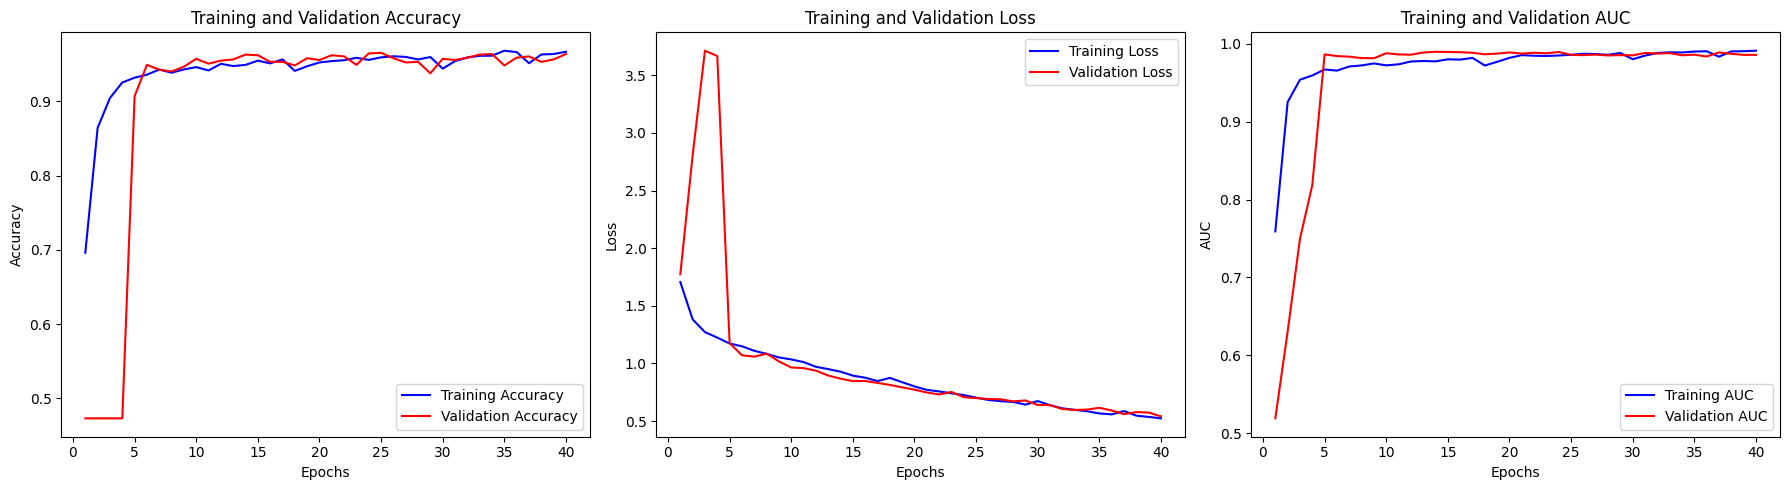

39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step


<Figure size 800x600 with 0 Axes>

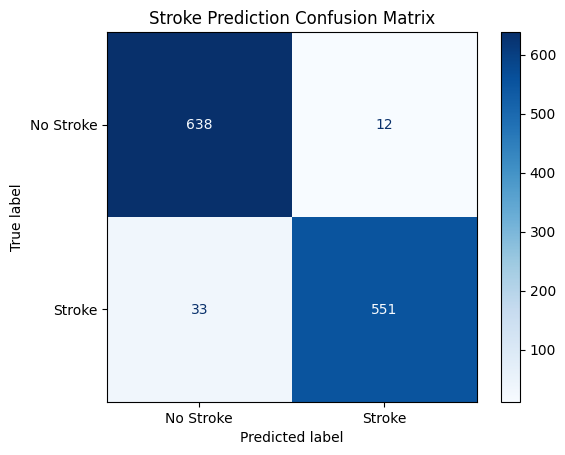

              precision    recall  f1-score   support

   No Stroke       0.95      0.98      0.97       650
      Stroke       0.98      0.94      0.96       584

    accuracy                           0.96      1234
   macro avg       0.96      0.96      0.96      1234
weighted avg       0.96      0.96      0.96      1234



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
auc = history.history['auc']
val_auc = history.history['val_auc']

epochs = range(1, len(acc) + 1)

# Plot accuracy
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 3, 2)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot AUC
plt.subplot(1, 3, 3)
plt.plot(epochs, auc, 'b', label='Training AUC')
plt.plot(epochs, val_auc, 'r', label='Validation AUC')
plt.title('Training and Validation AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()

plt.tight_layout()
plt.show()

# Generate predictions for confusion matrix
y_pred_prob = model.predict(X_val)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()
y_true = y_val.values if isinstance(y_val, pd.Series) else y_val

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display confusion matrix
plt.figure(figsize=(8, 6))
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Stroke", "Stroke"])
cmd.plot(cmap=plt.cm.Blues)
plt.title("Stroke Prediction Confusion Matrix")
plt.show()

# Print classification metrics
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=["No Stroke", "Stroke"]))


In [ ]:
import shap 
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm  # For progress tracking

# Wrapper function for SHAP
def model_wrapper(x):
    # Convert tabular input to image format
    batch_size = x.shape[0]
    padded = np.zeros((batch_size, 32, 32, 3))
    padded[:, :x.shape[1], 0, 0] = x
    return model.predict(padded, verbose=0)

# Function to extract original features
def extract_features(padded_data):
    return padded_data[:, :20, 0, 0]

X_background = extract_features(X_train[:50])  # Background data

# Used All validation samples 
X_test_sample = extract_features(X_val)   

# Create a shap explainer
explainer = shap.KernelExplainer(
    model_wrapper, 
    data=X_background,
    link="logit"
)

print("Calculating SHAP values for all validation samples. This may take a while...")
shap_values = explainer.shap_values(X_test_sample, nsamples=100)  # Reduced nsamples for speed


Calculating SHAP values for all validation samples. This may take a while...


100%|██████████| 1234/1234 [50:01<00:00,  2.43s/it]


In [73]:
%matplotlib inline
import matplotlib.pyplot as plt

# Define feature names
feature_names = [
    "age", "hypertension", "heart_disease", "avg_glucose_level", "bmi",
    "gender_Female", "gender_Male", "gender_Other", "ever_married_No",
    "ever_married_Yes", "work_type_Govt_job", "work_type_Never_worked",
    "work_type_Private", "work_type_self-employed", "work_type_children",
    "Residence_type_Rural", "Residence_type_Urban", "smoking_status_never smoked",
    "smoking_status_formerly smoked", "smoking_status_smokes"
]
"""
# Create bar plot of feature importance
plt.figure(figsize=(12, 7))

if isinstance(shap_values, list) and len(shap_values) == 2:
    # For binary classification
    shap.summary_plot(
        shap_values[1],  # Positive class
        X_test_sample,
        feature_names=feature_names,
        plot_type='bar',  # Use bar instead of dot
        show=False
    )
else:
    shap.summary_plot(
        shap_values,
        X_test_sample,
        feature_names=feature_names,
        plot_type='bar',
        show=False
    )

plt.title("Feature Impact on Stroke Prediction (Magnitude)")
plt.tight_layout()
plt.show()
"""


'\n# Create bar plot of feature importance\nplt.figure(figsize=(12, 7))\n\nif isinstance(shap_values, list) and len(shap_values) == 2:\n    # For binary classification\n    shap.summary_plot(\n        shap_values[1],  # Positive class\n        X_test_sample,\n        feature_names=feature_names,\n        plot_type=\'bar\',  # Use bar instead of dot\n        show=False\n    )\nelse:\n    shap.summary_plot(\n        shap_values,\n        X_test_sample,\n        feature_names=feature_names,\n        plot_type=\'bar\',\n        show=False\n    )\n\nplt.title("Feature Impact on Stroke Prediction (Magnitude)")\nplt.tight_layout()\nplt.show()\n'

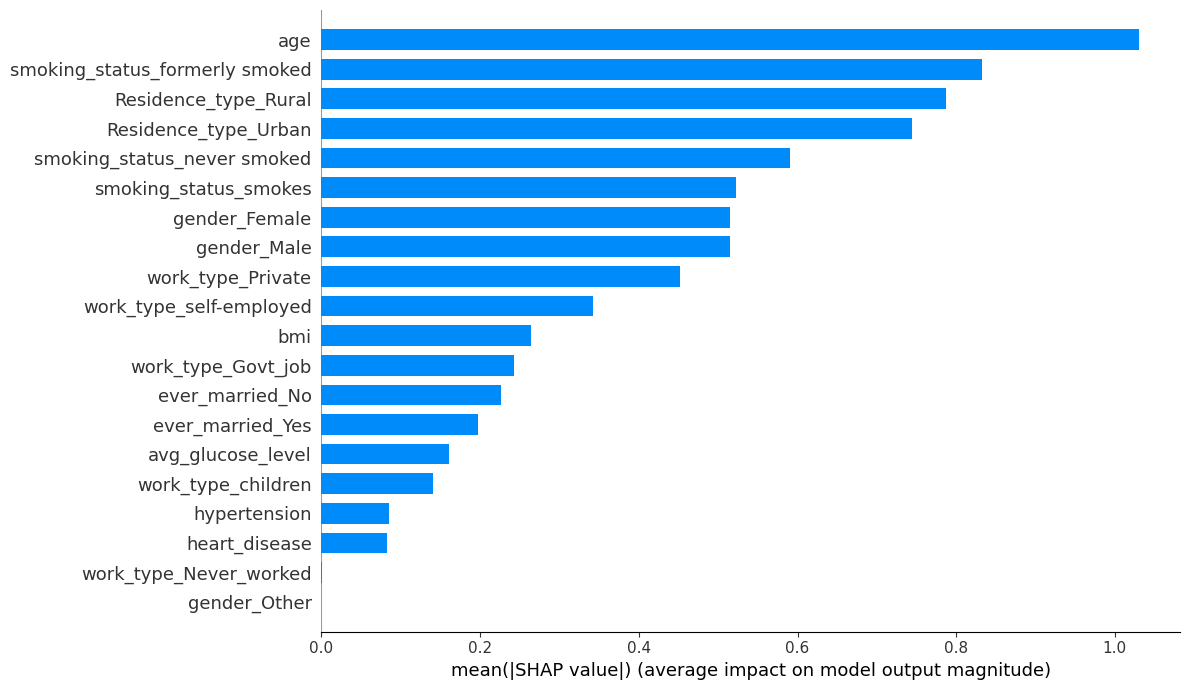

In [74]:
import shap
import numpy as np

# Reshape SHAP values to match X_test_sample dimensions
shap_values_reshaped = shap_values.reshape(X_test_sample.shape)

# Create summary plot with properly shaped arrays
shap.summary_plot(
    shap_values_reshaped,
    X_test_sample,
    feature_names=feature_names,
    plot_size=(12, 7),
    plot_type='bar'
)




In [8]:
#                   ****prediction using UI****
"""
import gradio as gr
import tensorflow as tf
from joblib import load
import numpy as np
import pandas as pd

# Load model and scaler once (outside function for efficiency)
model = tf.keras.models.load_model('resnet50gru_model.keras')
scaler = load('stroke_scaler.joblib')

# Define required features in order
required_features = [
    'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
    'gender_Female', 'gender_Male', 'gender_Other', 'ever_married_No',
    'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked',
    'work_type_Private', 'work_type_self-employed', 'work_type_children',
    'Residence_type_Rural', 'Residence_type_Urban', 
    'smoking_status_never smoked', 'smoking_status_formerly smoked', 
    'smoking_status_smokes'
]

def predict_ui(
    age, hypertension, heart_disease, avg_glucose_level, bmi,
    gender, ever_married, work_type, residence_type, smoking_status
):
    # one-hot encoded features from categorical inputs
    gender_cols = {
        'Female': [1, 0, 0],
        'Male': [0, 1, 0],
        'Other': [0, 0, 1]
    }
    married_cols = {
        'No': [1, 0],
        'Yes': [0, 1]
    }
    work_type_cols = {
        'Govt Job': [1, 0, 0, 0, 0],
        'Never Worked': [0, 1, 0, 0, 0],
        'Private': [0, 0, 1, 0, 0],
        'Self-employed': [0, 0, 0, 1, 0],
        'Children': [0, 0, 0, 0, 1]
    }
    residence_cols = {
        'Rural': [1, 0],
        'Urban': [0, 1]
    }
    smoking_cols = {
        'Never Smoked': [1, 0, 0],
        'Formerly Smoked': [0, 1, 0],
        'Smokes': [0, 0, 1]
    }

    #dataframe with proper one-hot encoding
    data = pd.DataFrame([{
        'age': age,
        'hypertension': hypertension,
        'heart_disease': heart_disease,
        'avg_glucose_level': avg_glucose_level,
        'bmi': bmi,
        'gender_Female': gender_cols[gender][0],
        'gender_Male': gender_cols[gender][1],
        'gender_Other': gender_cols[gender][2],
        'ever_married_No': married_cols[ever_married][0],
        'ever_married_Yes': married_cols[ever_married][1],
        'work_type_Govt_job': work_type_cols[work_type][0],
        'work_type_Never_worked': work_type_cols[work_type][1],
        'work_type_Private': work_type_cols[work_type][2],
        'work_type_self-employed': work_type_cols[work_type][3],
        'work_type_children': work_type_cols[work_type][4],
        'Residence_type_Rural': residence_cols[residence_type][0],
        'Residence_type_Urban': residence_cols[residence_type][1],
        'smoking_status_never smoked': smoking_cols[smoking_status][0],
        'smoking_status_formerly smoked': smoking_cols[smoking_status][1],
        'smoking_status_smokes': smoking_cols[smoking_status][2]
    }])

    # Preprocess and predict
    data[['age', 'avg_glucose_level', 'bmi']] = scaler.transform(data[['age', 'avg_glucose_level', 'bmi']])
    X_numpy = data[required_features].values.astype(np.float32)
    X_padded = np.zeros((1, 32, 32, 3))
    X_padded[:, :X_numpy.shape[1], :1, 0] = X_numpy[:, :, np.newaxis]
    
    prob = model.predict(X_padded)[0][0]
    return f"Stroke Probability: {prob:.2%}\nRisk Level: {'High' if prob > 0.50 else 'Medium' if prob > 0.25 else 'Low'}"

#input components
inputs = [
    gr.Number(label="Age", minimum=0, maximum=120),
    gr.Radio([0, 1], label="Hypertension (0 = No, 1 = Yes)"),
    gr.Radio([0, 1], label="Heart Disease (0 = No, 1 = Yes)"),
    gr.Number(label="Average Glucose Level", minimum=50, maximum=300),
    gr.Number(label="BMI", minimum=10, maximum=50),
    gr.Dropdown(["Female", "Male", "Other"], label="Gender"),
    gr.Dropdown(["No", "Yes"], label="Ever Married"),
    gr.Dropdown(["Govt Job", "Never Worked", "Private", "Self-employed", "Children"], label="Work Type"),
    gr.Dropdown(["Rural", "Urban"], label="Residence Type"),
    gr.Dropdown(["Never Smoked", "Formerly Smoked", "Smokes"], label="Smoking Status")
]

# Create interface
interface = gr.Interface(
    fn=predict_ui,
    inputs=inputs,
    outputs=gr.Label(label="Stroke Risk Prediction"),
    title="Stroke Risk Predictor",
    description="Enter patient information to predict stroke risk probability.",
    examples=[
        [67, 0, 1, 228.69, 36.6, "Male", "Yes", "Private", "Urban", "Formerly Smoked"],
        [45, 1, 0, 105.32, 28.4, "Female", "No", "Govt Job", "Rural", "Never Smoked"]
    ]
)

# Launch the app
if __name__ == "__main__":
    try:
        interface.launch()
    except KeyboardInterrupt:   # ctrl+c to close the UI and release the port.
        interface.close()
"""

'\nimport gradio as gr\nimport tensorflow as tf\nfrom joblib import load\nimport numpy as np\nimport pandas as pd\n\n# Load model and scaler once (outside function for efficiency)\nmodel = tf.keras.models.load_model(\'resnet50gru_model.keras\')\nscaler = load(\'stroke_scaler.joblib\')\n\n# Define required features in order\nrequired_features = [\n    \'age\', \'hypertension\', \'heart_disease\', \'avg_glucose_level\', \'bmi\',\n    \'gender_Female\', \'gender_Male\', \'gender_Other\', \'ever_married_No\',\n    \'ever_married_Yes\', \'work_type_Govt_job\', \'work_type_Never_worked\',\n    \'work_type_Private\', \'work_type_self-employed\', \'work_type_children\',\n    \'Residence_type_Rural\', \'Residence_type_Urban\', \n    \'smoking_status_never smoked\', \'smoking_status_formerly smoked\', \n    \'smoking_status_smokes\'\n]\n\ndef predict_ui(\n    age, hypertension, heart_disease, avg_glucose_level, bmi,\n    gender, ever_married, work_type, residence_type, smoking_status\n):\n    # 

In [7]:
interface.close() #to close the interface.

Closing server running on port: 7860


In [ ]:
"""
import pandas as pd

sample_data = pd.DataFrame({
    'age': [60, 45, 52, 30],
    'hypertension': [0, 1, 0, 0],
    'heart_disease': [1, 0, 0, 0],
    'avg_glucose_level': [220.69, 105.32, 140.12, 85.6],
    'bmi': [36.6, 28.4, 31.2, 22.5],
    'gender_Female': [1, 0, 1, 0],
    'gender_Male': [0, 1, 0, 1],
    'gender_Other': [0, 0, 0, 0],
    'ever_married_No': [0, 1, 1, 0],
    'ever_married_Yes': [1, 0, 0, 1],
    'work_type_Govt_job': [0, 1, 0, 0],
    'work_type_Never_worked': [0, 0, 0, 1],
    'work_type_Private': [1, 0, 1, 0],
    'work_type_self-employed': [0, 0, 0, 0],
    'work_type_children': [0, 0, 0, 0],
    'Residence_type_Rural': [1, 0, 1, 0],
    'Residence_type_Urban': [0, 1, 0, 1],
    'smoking_status_never smoked': [1, 0, 1, 0],
    'smoking_status_formerly smoked': [0, 1, 0, 1],
    'smoking_status_smokes': [0, 0, 0, 0]
})


# Predict for all 4 samples
probs = predict_new_data(sample_data)

# Print results with proper indexing
for i, prob in enumerate(probs):
    print(f"Stroke probability for sample {i+1}: {prob[0]:.2%}")

"""

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Stroke probability for sample 1: 2.36%
Stroke probability for sample 2: 0.24%
Stroke probability for sample 3: 0.26%
Stroke probability for sample 4: 0.31%
